<a href="https://colab.research.google.com/github/socd06/openvino_colab/blob/master/interview_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion classification with Intel OpenVINO Toolkit in Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Setup Project files

In [3]:
cd /content

/content


In [4]:
!git clone "https://github.com/socd06/openvino_colab.git"

Cloning into 'openvino_colab'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 162 (delta 74), reused 81 (delta 23), pack-reused 0
Receiving objects: 100% (162/162), 25.99 MiB | 21.11 MiB/s, done.
Resolving deltas: 100% (74/74), done.


# Setting up environment paths

In [0]:
install_dir = '/opt/intel/openvino/'
model_optimizer = '/opt/intel/openvino/deployment_tools/model_optimizer/'
deployment_tools = '/opt/intel/openvino/deployment_tools/'
model_zoo = '/opt/intel/openvino/deployment_tools/open_model_zoo/'

# OpenVINO Installation

In [6]:
cd openvino_colab/

/content/openvino_colab


In [7]:
!python openvino_initialization_script.py

--2020-03-09 01:46:16--  https://storage.googleapis.com/open_vino_public/l_openvino_toolkit_p_2020.1.023.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 508213676 (485M) [application/x-compressed]
Saving to: ‘l_openvino_toolkit_p_2020.1.023.tgz’

l_openvino_toolkit_ 100%[===================>] 484.67M  83.2MB/s    in 6.3s    

2020-03-09 01:46:23 (76.8 MB/s) - ‘l_openvino_toolkit_p_2020.1.023.tgz’ saved [508213676/508213676]


This script installs the following OpenVINO 3rd-party dependencies:
  1. GTK+, FFmpeg and GStreamer libraries used by OpenCV
  2. libusb library required for Myriad plugin for Inference Engine
  3. build dependencies for OpenVINO samples

Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:2 http://security.ubuntu.com/ubu

# Downloading Models

Human Pose Estimation model
* **human-pose-estimation-0001** ([Documentation](https://docs.openvinotoolkit.org/2020.1/_models_intel_human_pose_estimation_0001_description_human_pose_estimation_0001.html))

In [8]:
!python $model_zoo'tools/downloader/'downloader.py --name human-pose-estimation-0001 --precisions FP32-INT8 -o /content/openvino_colab/models

################|| Downloading models ||################

========== Downloading /content/openvino_colab/models/intel/human-pose-estimation-0001/FP32-INT8/human-pose-estimation-0001.xml
... 100%, 398 KB, 915 KB/s, 0 seconds passed

========== Downloading /content/openvino_colab/models/intel/human-pose-estimation-0001/FP32-INT8/human-pose-estimation-0001.bin
... 100%, 16126 KB, 1796 KB/s, 8 seconds passed

################|| Post-processing ||################



Fast Face Recognition model 

* **face-detection-adas-binary-0001** ([Documentation](https://docs.openvinotoolkit.org/2019_R1/_face_detection_adas_binary_0001_description_face_detection_adas_binary_0001.html))

In [9]:
!python $model_zoo'tools/downloader/'downloader.py --name face-detection-adas-binary-0001 -o /content/openvino_colab/models

################|| Downloading models ||################

========== Downloading /content/openvino_colab/models/intel/face-detection-adas-binary-0001/FP32-INT1/face-detection-adas-binary-0001.xml
... 100%, 113 KB, 405 KB/s, 0 seconds passed

========== Downloading /content/openvino_colab/models/intel/face-detection-adas-binary-0001/FP32-INT1/face-detection-adas-binary-0001.bin
... 100%, 1797 KB, 1800 KB/s, 0 seconds passed

################|| Post-processing ||################



Emotions Recognition model 

* **emotions-recognition-retail-0003** ([Documentation](https://docs.openvinotoolkit.org/2020.1/_models_intel_emotions_recognition_retail_0003_description_emotions_recognition_retail_0003.html#outputs))

In [10]:
!python $model_zoo'tools/downloader/'downloader.py --name emotions-recognition-retail-0003 --precisions FP32-INT8 -o /content/openvino_colab/models

################|| Downloading models ||################

========== Downloading /content/openvino_colab/models/intel/emotions-recognition-retail-0003/FP32-INT8/emotions-recognition-retail-0003.xml
... 100%, 100 KB, 359 KB/s, 0 seconds passed

========== Downloading /content/openvino_colab/models/intel/emotions-recognition-retail-0003/FP32-INT8/emotions-recognition-retail-0003.bin
... 100%, 9714 KB, 15974 KB/s, 0 seconds passed

################|| Post-processing ||################



In [11]:
# CAR META MODEL (FOR TESTING)
!python $model_zoo'tools/downloader/'downloader.py --name vehicle-attributes-recognition-barrier-0039 --precisions FP32-INT8 -o /content/OpenDevLibrary/demo_files/models

################|| Downloading models ||################

========== Downloading /content/OpenDevLibrary/demo_files/models/intel/vehicle-attributes-recognition-barrier-0039/FP32-INT8/vehicle-attributes-recognition-barrier-0039.xml
... 100%, 85 KB, 594 KB/s, 0 seconds passed

========== Downloading /content/OpenDevLibrary/demo_files/models/intel/vehicle-attributes-recognition-barrier-0039/FP32-INT8/vehicle-attributes-recognition-barrier-0039.bin
... 100%, 2453 KB, 47869 KB/s, 0 seconds passed

################|| Post-processing ||################



# Running Inference

In [62]:
cd /content/openvino_colab/demo_files/

/content/openvino_colab/demo_files


In [66]:
#CAR META for testing
#!source /opt/intel/openvino/bin/setupvars.sh && python app.py -i "images/blue-car.jpg" -n "testing2" -t "CAR_META" -m "/content/OpenDevLibrary/demo_files/models/intel/vehicle-attributes-recognition-barrier-0039/FP32-INT8/vehicle-attributes-recognition-barrier-0039.xml"

[setupvars.sh] OpenVINO environment initialized
Processing...
Selected CAR_META Model
Success writing output
Saving output...


Pose Estimation

In [71]:
!source /opt/intel/openvino/bin/setupvars.sh && python app.py -i "/content/openvino_colab/img/frame2.png" -t "POSE" -n "fm2" -m "/content/openvino_colab/models/intel/human-pose-estimation-0001/FP32-INT8/human-pose-estimation-0001.xml" 

[setupvars.sh] OpenVINO environment initialized
Processing...
Selected POSE Model
Success writing output
Saving output...


Face Detection

In [70]:
#Under development
#!source /opt/intel/openvino/bin/setupvars.sh && python app.py -i "/content/openvino_colab/frame (1).png" -t "FACE" -n "fm(1)" -m "/content/openvino_colab/models/intel/face-detection-adas-binary-0001/FP32-INT1/face-detection-adas-binary-0001.xml" 


[setupvars.sh] OpenVINO environment initialized
Traceback (most recent call last):
  File "app.py", line 229, in <module>
    main()
  File "app.py", line 225, in main
    perform_inference(args) #On images
  File "app.py", line 166, in perform_inference
    preprocessed_image = preprocessing(image, h, w)
  File "/content/openvino_colab/demo_files/handle_models.py", line 118, in preprocessing
    image = cv2.resize(image, (width, height))
TypeError: Expected Ptr<cv::UMat> for argument 'src'


Emotion Recognition

In [50]:
!source /opt/intel/openvino/bin/setupvars.sh && python app.py -i "/content/openvino_colab/img/frame (3).png" -t "EMO" -n "fm(3)" -m "/content/openvino_colab/models/intel/emotions-recognition-retail-0003/FP32-INT8/emotions-recognition-retail-0003.xml" 

[setupvars.sh] OpenVINO environment initialized
Processing...
Selected EMO Model
happy
Success writing output
Saving output...


# Output and Results

In [73]:
cd /content/openvino_colab/demo_files/outputs/

/content/openvino_colab/demo_files/outputs


In [0]:
from google.colab.patches import cv2_imshow
import cv2

## Pose Detection Results

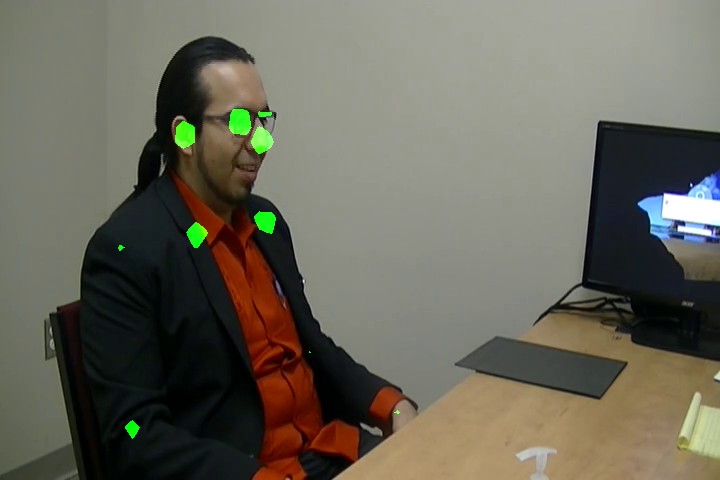

In [75]:
img = cv2.imread("POSE-output-fm1.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

## Emotion Recognition Results

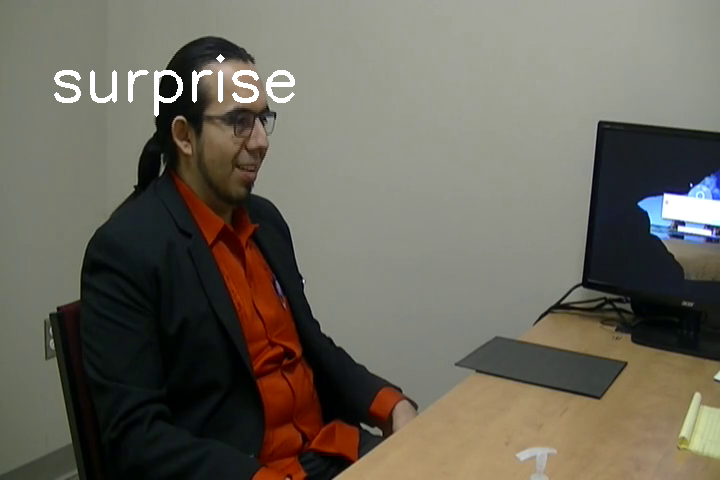

In [60]:
img = cv2.imread("EMO-output-fm1.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)